In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold
import warnings
warnings.simplefilter(action='ignore')
sns.set()
plt.style.use("ggplot")
%matplotlib inline

In [2]:
!pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 3.4 MB/s eta 0:00:00


# EDA

In [5]:
# Read Dataset
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
#Independent feaure:
#'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'
#Dependent feature: 'Outcome'

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.shape

(768, 9)

In [ ]:
df.Outcome.value_counts()*100/len(df)

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

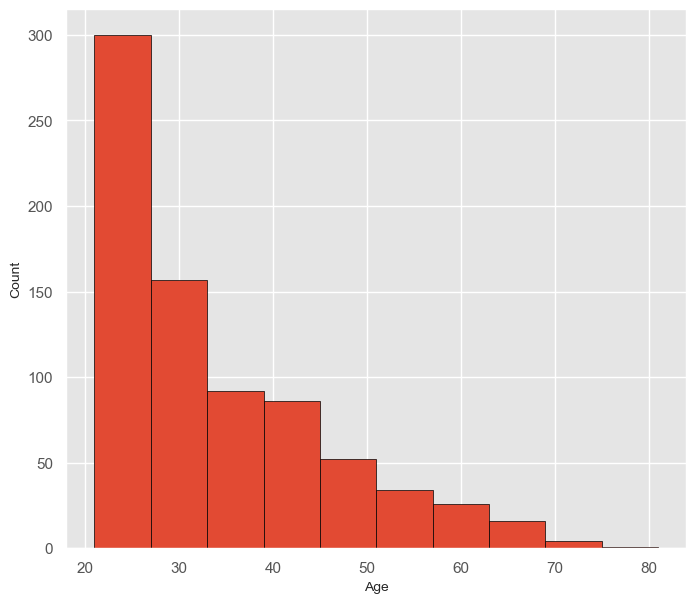

In [ ]:
# plot the hist of the age
plt.figure(figsize=(8,7))
plt.xlabel('Age', fontsize=10)
plt.ylabel('Count', fontsize=10)
df['Age'].hist(edgecolor="black")

In [ ]:
df['Age'].max()

81

In [ ]:
df['Age'].min()

21

<Axes: xlabel='Age', ylabel='Density'>

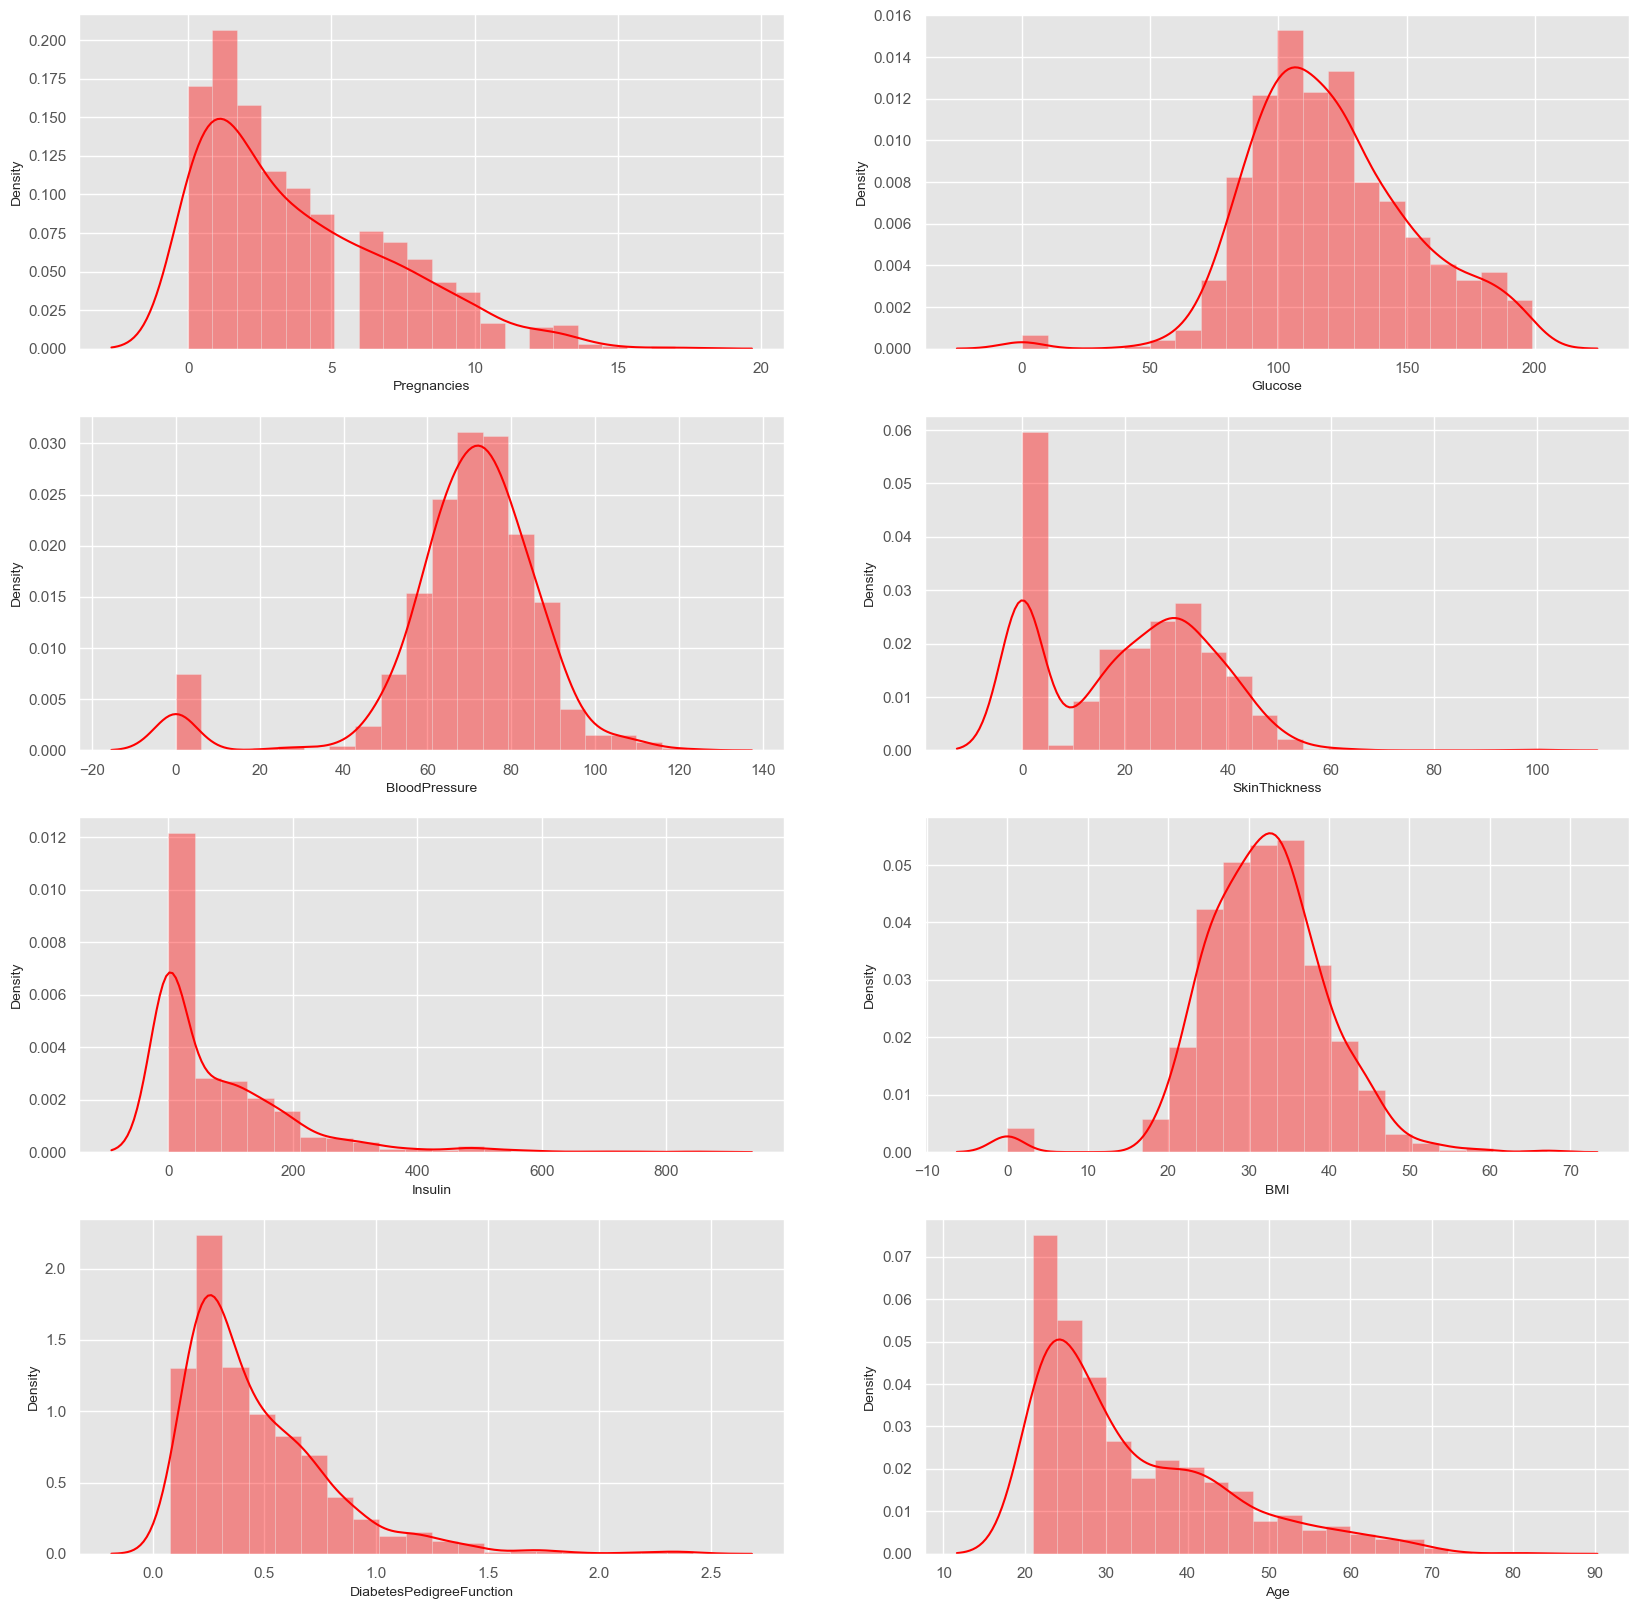

In [ ]:
# density graph
# 4*2=8
# columns=2 figure
# having 4 row

# [0,0], [0,1]
# [1,0], [1,1]
# [2,0], [2,1]
# [3,0], [3,1]

fig,ax = plt.subplots(4,2, figsize=(20,20))
sns.distplot(df.Pregnancies, bins=20, ax=ax[0,0], color="red")
sns.distplot(df.Glucose, bins=20, ax=ax[0,1], color="red")
sns.distplot(df.BloodPressure, bins=20, ax=ax[1,0], color="red")
sns.distplot(df.SkinThickness, bins=20, ax=ax[1,1], color="red")
sns.distplot(df.Insulin, bins=20, ax=ax[2,0], color="red")
sns.distplot(df.BMI, bins=20, ax=ax[2,1], color="red")
sns.distplot(df.DiabetesPedigreeFunction, bins=20, ax=ax[3,0], color="red")
sns.distplot(df.Age, bins=20, ax=ax[3,1], color="red")

In [ ]:
df.groupby('Outcome').agg({'Pregnancies':'mean'})

,Pregnancies
Outcome,
0,3.298000
1,4.865672


In [ ]:
df.groupby("Outcome").agg({'Pregnancies':'max'})

,Pregnancies
Outcome,
0,13
1,17


In [ ]:
df.groupby("Outcome").agg({'Glucose':'mean'})

,Glucose
Outcome,
0,109.980000
1,141.257463


In [ ]:
df.groupby("Outcome").agg({'Glucose':'max'})

,Glucose
Outcome,
0,197
1,199


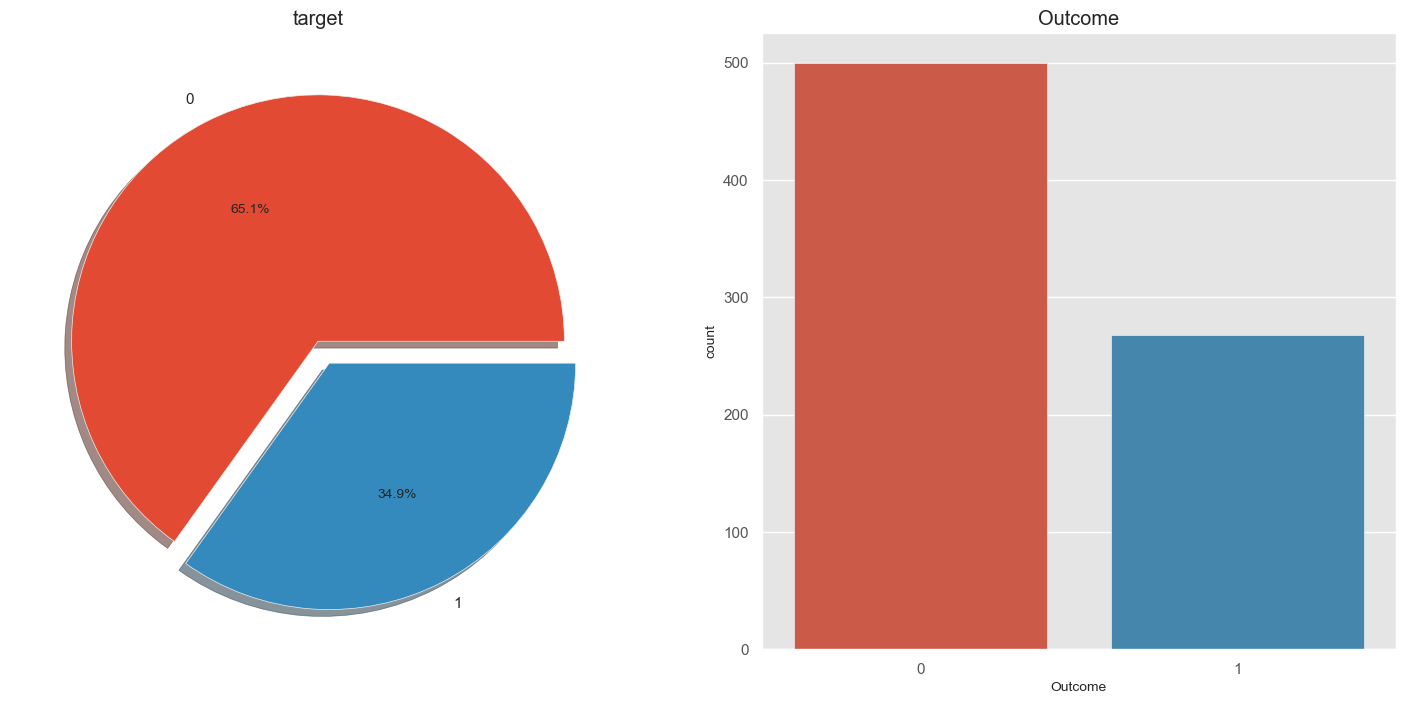

In [ ]:
# 0: Healthy
# 1: Diabetes

f,ax = plt.subplots(1,2, figsize=(18,8))
df['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct = "%1.1f%%", ax=ax[0], shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot(x='Outcome', data=df, ax=ax[1])
ax[1].set_title('Outcome')
plt.show()

In [ ]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


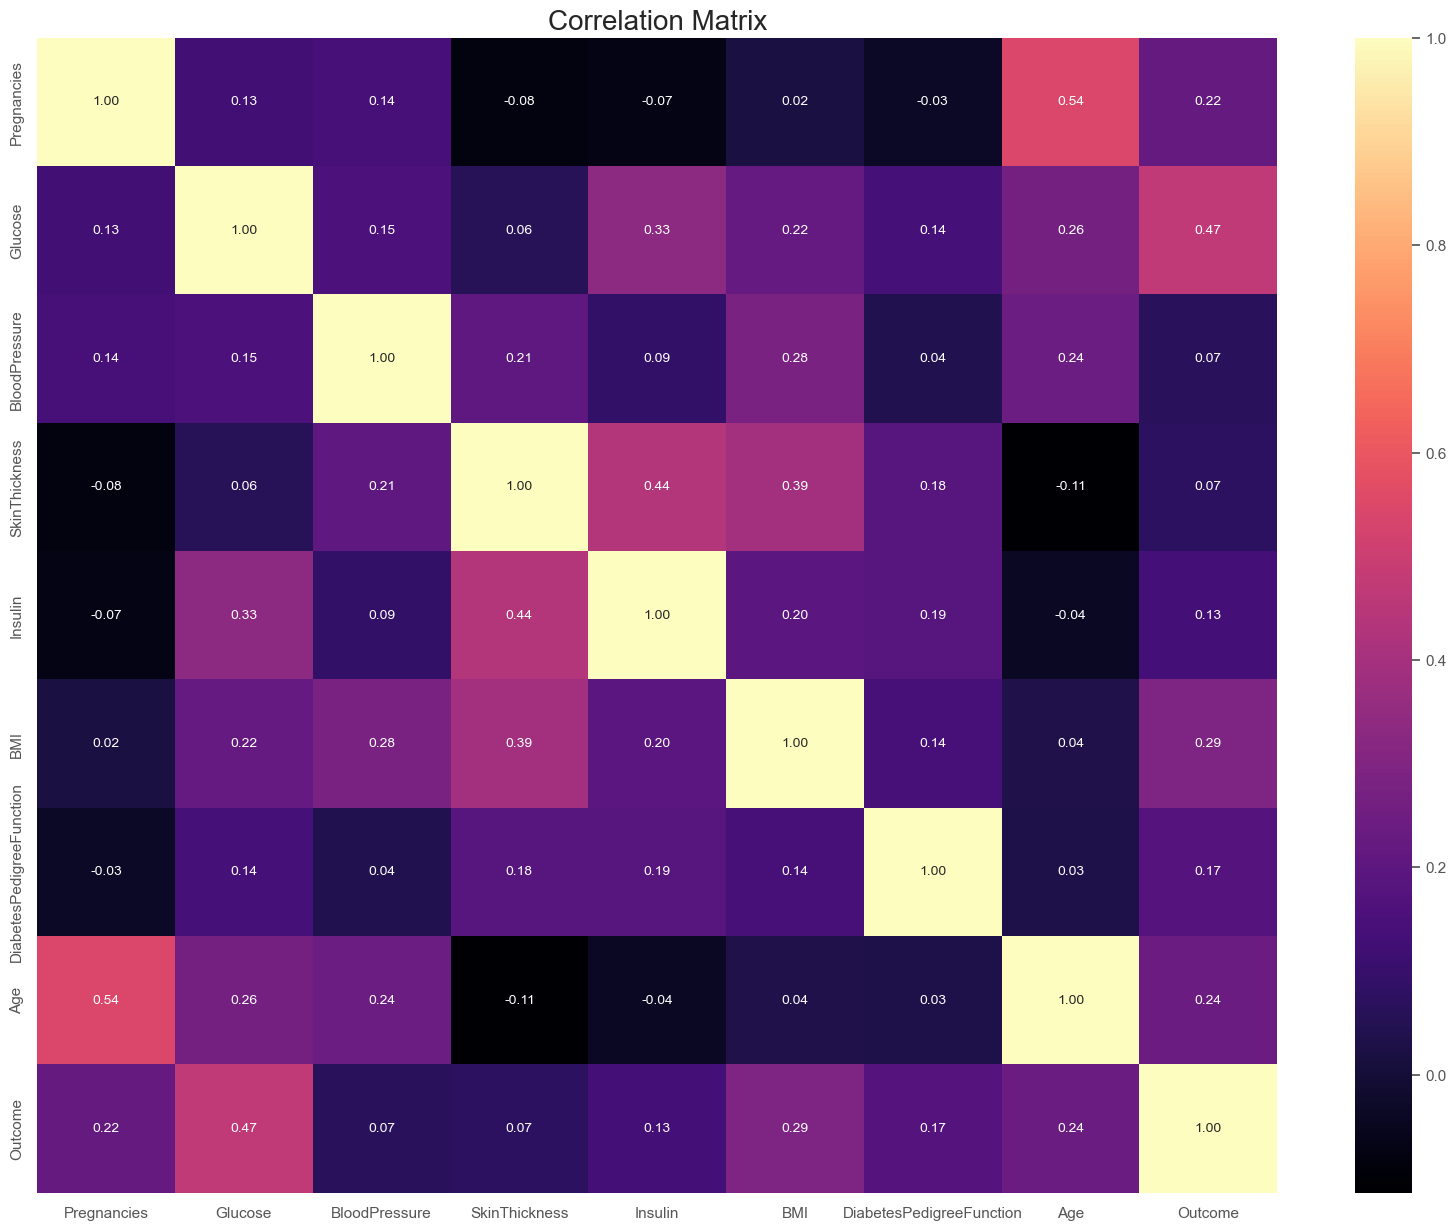

In [ ]:
f,ax = plt.subplots(figsize=[20,15])
sns.heatmap(df.corr(), annot=True, fmt = '.2f', ax=ax, cmap='magma')
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

# Data preprocessing

In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
#convert 0 to NaN
df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']] = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0, np.NaN)

In [7]:
df.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1


<Axes: >

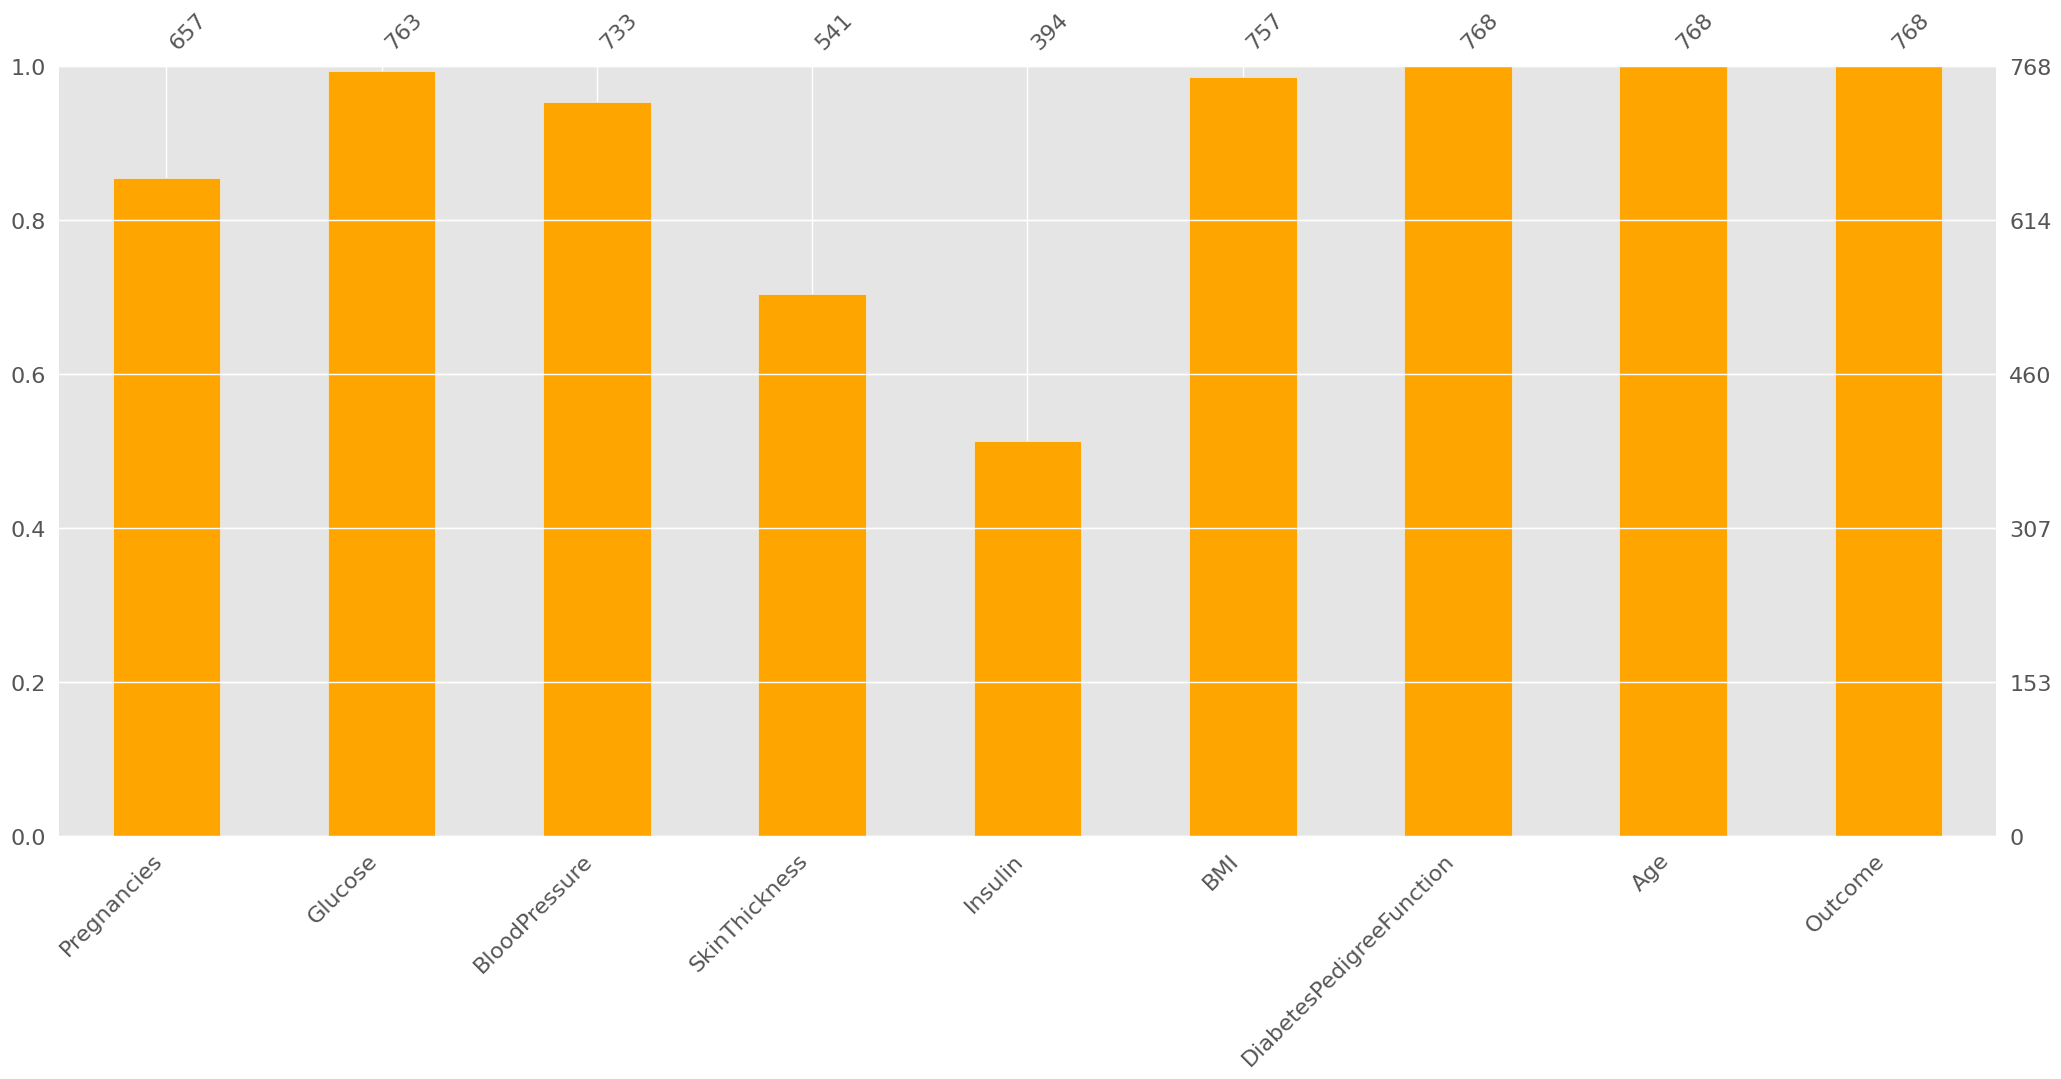

In [8]:
import missingno as msno
msno.bar(df, color="orange")

In [8]:
#converting none value to median of that feature corresponding to the outcome
def median_target(var):
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [9]:
columns = df.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    df.loc[(df['Outcome'] == 0 ) & (df[i].isnull()), i] = median_target(i)[i][0]
    df.loc[(df['Outcome'] == 1 ) & (df[i].isnull()), i] = median_target(i)[i][1]

In [10]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [11]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
# pair plot
p = sns.pairplot(df, hue="Outcome")

Output hidden; open in https://colab.research.google.com to view.

# Outlier Detection

In [13]:
for feature in df:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR
    if df[(df[feature]>upper)].any(axis=None):
        print(feature, "yes")
    else:
        print(feature, "no")

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


<Axes: xlabel='Insulin'>

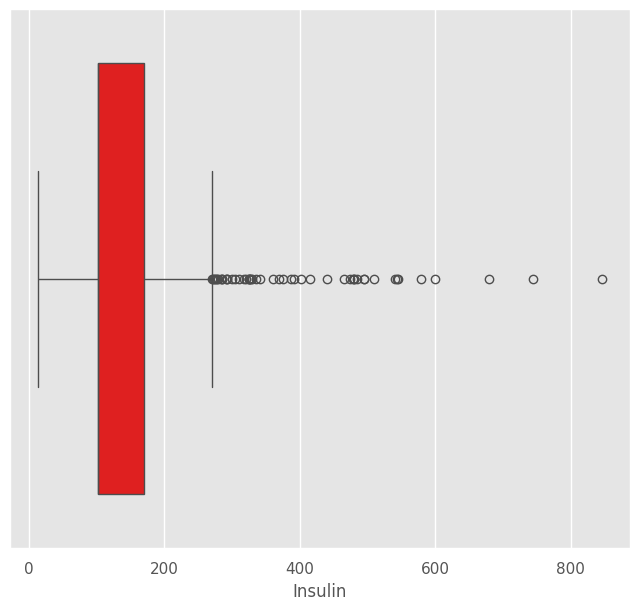

In [14]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["Insulin"], color="red")

In [15]:
Q1 = df.Insulin.quantile(0.25)
Q3 = df.Insulin.quantile(0.75)
IQR = Q3-Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
df.loc[df['Insulin']>upper, "Insulin"] = upper

<Axes: xlabel='Insulin'>

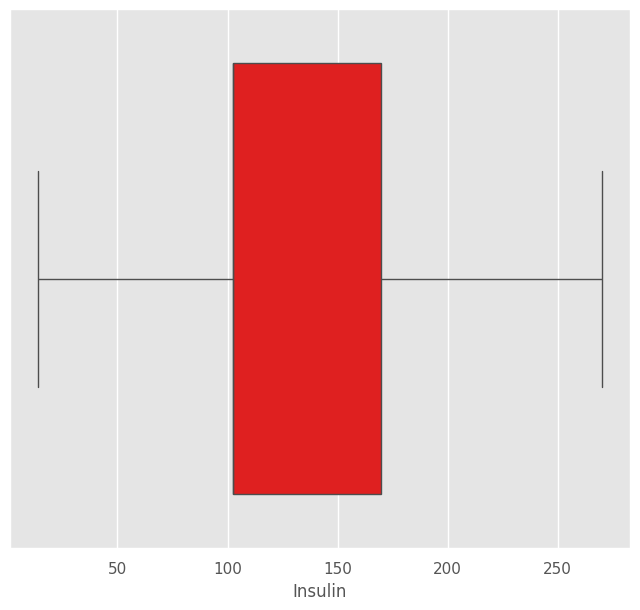

In [16]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["Insulin"], color="red")

In [17]:
for feature in df:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR
    df.loc[df[feature]>upper, feature] = upper
    df.loc[df[feature]<lower, feature] = lower

In [18]:
for feature in df:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR
    if df[(df[feature]>upper)].any(axis=None):
        print(feature, "yes")
    else:
        print(feature, "no")

Pregnancies no
Glucose no
BloodPressure no
SkinThickness no
Insulin no
BMI no
DiabetesPedigreeFunction no
Age no
Outcome no


In [ ]:
df.shape

(768, 9)

<Axes: xlabel='BloodPressure'>

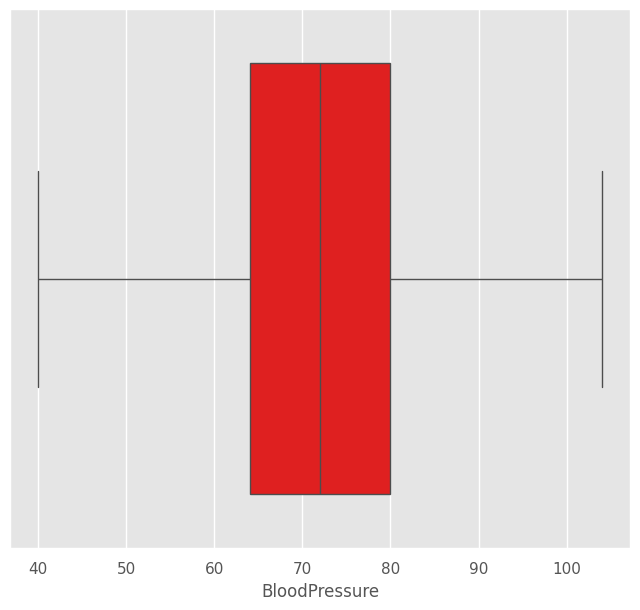

In [19]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["BloodPressure"], color="red")

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,5.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1.0


# Feature Enginnering

In [19]:
NewBMI = pd.Series(["Underweight","Normal", "Overweight","Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")

In [20]:
NewBMI

0    Underweight
1         Normal
2     Overweight
3      Obesity 1
4      Obesity 2
5      Obesity 3
dtype: category
Categories (6, object): ['Normal', 'Obesity 1', 'Obesity 2', 'Obesity 3', 'Overweight',
                         'Underweight']

In [21]:
df['NewBMI'] = NewBMI
df.loc[df["BMI"]<18.5, "NewBMI"] = NewBMI[0]
df.loc[(df["BMI"]>18.5) & df["BMI"]<=24.9, "NewBMI"] = NewBMI[1]
df.loc[(df["BMI"]>24.9) & df["BMI"]<=29.9, "NewBMI"] = NewBMI[2]
df.loc[(df["BMI"]>29.9) & df["BMI"]<=34.9, "NewBMI"] = NewBMI[3]
df.loc[(df["BMI"]>34.9) & df["BMI"]<=39.9, "NewBMI"] = NewBMI[4]
df.loc[df["BMI"]>39.9, "NewBMI"] = NewBMI[5]

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50.0,1.0,Obesity 2
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31.0,0.0,Obesity 2
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32.0,1.0,Obesity 2
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,Obesity 2
4,5.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1.0,Obesity 3


In [23]:
df.NewBMI.value_counts()

NewBMI
Obesity 2      670
Obesity 3       98
Obesity 1        0
Normal           0
Overweight       0
Underweight      0
Name: count, dtype: int64

In [22]:
# if insulin>=16 & insuline<=166->normal
def set_insuline(row):
    if row["Insulin"]>=16 and row["Insulin"]<=166:
        return "Normal"
    else:
        return "Abnormal"

In [23]:
df = df.assign(NewInsulinScore=df.apply(set_insuline, axis=1))

In [26]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50.0,1.0,Obesity 2,Abnormal
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31.0,0.0,Obesity 2,Normal
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32.0,1.0,Obesity 2,Abnormal
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,Obesity 2,Normal
4,5.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1.0,Obesity 3,Abnormal


In [24]:
# Some intervals were determined according to the glucose variable and these were assigned categorical variables.
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype = "category")
df["NewGlucose"] = NewGlucose
df.loc[df["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
df.loc[(df["Glucose"] > 70) & (df["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
df.loc[(df["Glucose"] > 99) & (df["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
df.loc[df["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50.0,1.0,Obesity 2,Abnormal,Secret
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31.0,0.0,Obesity 2,Normal,Normal
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32.0,1.0,Obesity 2,Abnormal,Secret
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,Obesity 2,Normal,Normal
4,5.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1.0,Obesity 3,Abnormal,Secret


In [25]:
# One hot encoding
df = pd.get_dummies(df, columns = ["NewBMI", "NewInsulinScore", "NewGlucose"], drop_first=True)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50.0,1.0,0,1,0,0,0,0,0,0,0,1
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31.0,0.0,0,1,0,0,0,1,0,1,0,0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32.0,1.0,0,1,0,0,0,0,0,0,0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,0,1,0,0,0,1,0,1,0,0
4,5.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1.0,0,0,1,0,0,0,0,0,0,1


In [26]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'],
      dtype='object')

In [27]:
categorical_df = df[['NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret']]

In [28]:
categorical_df.head()

,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,False,True,False,False,False,False,False,False,False,True
1,False,True,False,False,False,True,False,True,False,False
2,False,True,False,False,False,False,False,False,False,True
3,False,True,False,False,False,True,False,True,False,False
4,False,False,True,False,False,False,False,False,False,True


In [29]:
y=df['Outcome']
X=df.drop(['Outcome','NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'], axis=1)

In [31]:
cols = X.columns
index = X.index

In [30]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31.0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,5.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0


In [ ]:
index

RangeIndex(start=0, stop=768, step=1)

In [32]:
# from sklearn.preprocessing import RobustScaler
# transformer = RobustScaler().fit(X)
# X=transformer.transform(X)
# X=pd.DataFrame(X, columns = cols, index = index)
scaler=StandardScaler()
X=scaler.fit_transform(X)
X=pd.DataFrame(X, columns = cols, index = index)

In [33]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.564727,0.864625,-0.030829,0.814337,0.626896,0.184034,0.588927,1.445691
1,-1.145487,-1.204727,-0.543685,0.020080,-0.526560,-0.865690,-0.378101,-0.189304
2,1.248813,2.014265,-0.714637,0.417209,0.626896,-1.360560,0.746595,-0.103252
3,-1.145487,-1.073339,-0.543685,-0.774176,-0.672894,-0.640749,-1.022787,-1.049828
4,0.222684,0.503310,-2.766060,0.814337,0.601072,1.608659,2.596563,-0.017199


In [34]:
X = pd.concat([X, categorical_df], axis=1)

In [35]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,0.564727,0.864625,-0.030829,0.814337,0.626896,0.184034,0.588927,1.445691,False,True,False,False,False,False,False,False,False,True
1,-1.145487,-1.204727,-0.543685,0.020080,-0.526560,-0.865690,-0.378101,-0.189304,False,True,False,False,False,True,False,True,False,False
2,1.248813,2.014265,-0.714637,0.417209,0.626896,-1.360560,0.746595,-0.103252,False,True,False,False,False,False,False,False,False,True
3,-1.145487,-1.073339,-0.543685,-0.774176,-0.672894,-0.640749,-1.022787,-1.049828,False,True,False,False,False,True,False,True,False,False
4,0.222684,0.503310,-2.766060,0.814337,0.601072,1.608659,2.596563,-0.017199,False,False,True,False,False,False,False,False,False,True


In [36]:
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [40]:
print("total train:")
len(X_train),

total train:


(614,)

In [41]:
print("total test:")
len(X_test)

total test:


154

# Model Training

# KNN

In [51]:
knn = KNeighborsClassifier()

# Hyperparameter tuning
param_grid = {'n_neighbors': [3, 5, 7, 9, 10, 11]}
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_knn = grid_search.best_estimator_
print("Best params: k=", grid_search.best_params_)

# Fit the model
best_knn.fit(X_train, y_train)

# Predictions
y_train_pred = best_knn.predict(X_train)
y_test_pred = best_knn.predict(X_test)

# Accuracy
train_acc = accuracy_score(y_train, y_train_pred)
knn_acc = accuracy_score(y_test, y_test_pred)
print("Training Accuracy:", train_acc)
print("Test Accuracy:", knn_acc)


Best params: k= {'n_neighbors': 9}
Training Accuracy: 0.8859934853420195
Test Accuracy: 0.8766233766233766


In [52]:
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[97 10]
 [ 9 38]]
              precision    recall  f1-score   support

         0.0       0.92      0.91      0.91       107
         1.0       0.79      0.81      0.80        47

    accuracy                           0.88       154
   macro avg       0.85      0.86      0.86       154
weighted avg       0.88      0.88      0.88       154



# Logistic Regression

In [53]:
log_reg = LogisticRegression()

# Hyperparameter tuning
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000], 'solver': ['lbfgs', 'liblinear']}
grid_search = GridSearchCV(log_reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_log_reg = grid_search.best_estimator_
print("Best params:", grid_search.best_params_)

# Fit the best model
best_log_reg.fit(X_train, y_train)

# Predictions
y_train_pred = best_log_reg.predict(X_train)
y_test_pred = best_log_reg.predict(X_test)

# Accuracy
train_acc = accuracy_score(y_train, y_train_pred)
log_reg_acc = accuracy_score(y_test, y_test_pred)
print("Training Accuracy:", train_acc)
print("Test Accuracy:", log_reg_acc)

# Confusion Matrix and Classification Report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Best params: {'C': 100, 'solver': 'lbfgs'}
Training Accuracy: 0.8534201954397395
Test Accuracy: 0.8961038961038961
Confusion Matrix:
 [[98  9]
 [ 7 40]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.92      0.92       107
         1.0       0.82      0.85      0.83        47

    accuracy                           0.90       154
   macro avg       0.87      0.88      0.88       154
weighted avg       0.90      0.90      0.90       154



# SVM

In [54]:
svc = SVC(probability=True)
parameter = {
    "gamma":[0.0001, 0.001, 0.01, 0.1],
    'C': [0.01, 0.05,0.5, 0.01, 1, 10, 15, 20]
}
grid_search = GridSearchCV(svc, parameter, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.01, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [55]:
# best_parameter
grid_search.best_params_

{'C': 15, 'gamma': 0.01}

In [56]:
grid_search.best_score_

0.8534053045448488

In [57]:
svc = SVC(C=15, gamma = 0.01, probability=True)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(accuracy_score(y_train, svc.predict(X_train)))
svc_acc = accuracy_score(y_test, svc.predict(X_test))
print(accuracy_score(y_test, svc.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8680781758957655
0.9025974025974026
[[99  8]
 [ 7 40]]
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93       107
         1.0       0.83      0.85      0.84        47

    accuracy                           0.90       154
   macro avg       0.88      0.89      0.89       154
weighted avg       0.90      0.90      0.90       154



# Decision Tree

In [58]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)
print(accuracy_score(y_train, DT.predict(X_train)))

print(accuracy_score(y_test, DT.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
0.7792207792207793
[[84 23]
 [11 36]]
              precision    recall  f1-score   support

         0.0       0.88      0.79      0.83       107
         1.0       0.61      0.77      0.68        47

    accuracy                           0.78       154
   macro avg       0.75      0.78      0.76       154
weighted avg       0.80      0.78      0.79       154



In [59]:
# hyperparameter tuning of dt
grid_param = {
    'criterion':['gini','entropy'],
    'max_depth' :  [3,5,7,10],
    'splitter' : ['best','radom'],
    'min_samples_leaf':[1,2,3,5,7],
    'min_samples_split':[1,2,3,5,7],
    'max_features':['None','sqrt','log2']
}
grid_search_dt = GridSearchCV(DT, grid_param, cv=50, n_jobs=-1, verbose = 1)
grid_search_dt.fit(X_train, y_train)

Fitting 50 folds for each of 1200 candidates, totalling 60000 fits


GridSearchCV(cv=50, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['None', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'radom']},
             verbose=1)

In [60]:
grid_search_dt.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'splitter': 'best'}

In [61]:
grid_search_dt.best_score_

0.8646153846153846

In [62]:
DT = grid_search_dt.best_estimator_
y_pred = DT.predict(X_test)
print(accuracy_score(y_train, DT.predict(X_train)))
dt_acc = accuracy_score(y_test, DT.predict(X_test))
print(accuracy_score(y_test, DT.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8973941368078175
0.8766233766233766
[[99  8]
 [11 36]]
              precision    recall  f1-score   support

         0.0       0.90      0.93      0.91       107
         1.0       0.82      0.77      0.79        47

    accuracy                           0.88       154
   macro avg       0.86      0.85      0.85       154
weighted avg       0.88      0.88      0.88       154



# Random Forest

In [63]:
# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 15, 20, 25],
    'max_features': [0.5, 0.75, 'sqrt', 'log2'],
    'min_samples_leaf': [1, 2, 3, 5],
    'min_samples_split': [2, 3, 5, 7],
    'n_estimators': [100, 130, 150, 200]
}
# Initialize the Random Forest classifier
rand_clf = RandomForestClassifier(random_state=0)

# Initialize Grid Search
grid_search_rf = GridSearchCV(rand_clf, param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit the model
grid_search_rf.fit(X_train, y_train)
# Get the best parameters and estimator
best_params = grid_search_rf.best_params_
best_rand_clf = grid_search_rf.best_estimator_

print("Best Parameters:", best_params)
print("Best Random Forest Classifier:", best_rand_clf)

# Fit the best model
best_rand_clf.fit(X_train, y_train)

# Predictions
y_train_pred = best_rand_clf.predict(X_train)
y_test_pred = best_rand_clf.predict(X_test)

# Accuracy
train_acc = accuracy_score(y_train, y_train_pred)
rand_acc = accuracy_score(y_test, y_test_pred)
print("Training Accuracy:", train_acc)
print("Test Accuracy:", rand_acc)

# Confusion Matrix and Classification Report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Fitting 5 folds for each of 2048 candidates, totalling 10240 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}
Best Random Forest Classifier: RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=2,
                       n_estimators=150, random_state=0)
Training Accuracy: 0.9820846905537459
Test Accuracy: 0.8961038961038961
Confusion Matrix:
 [[97 10]
 [ 6 41]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.91      0.92       107
         1.0       0.80      0.87      0.84        47

    accuracy                           0.90       154
   macro avg       0.87      0.89      0.88       154
weighted avg       0.90      0.90      0.90       154



# GradientBoostingClassifier

In [65]:
# Define the parameter grid
param_grid = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [50, 100, 150],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the Gradient Boosting classifier
gb_clf = GradientBoostingClassifier(random_state=0)

# Initialize Grid Search
grid_search_gb = GridSearchCV(gb_clf, param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit the model
grid_search_gb.fit(X_train, y_train)

# Get the best parameters and estimator
best_params = grid_search_gb.best_params_
best_gb_clf = grid_search_gb.best_estimator_

print("Best Parameters:", best_params)
print("Best Gradient Boosting Classifier:", best_gb_clf)

# Fit the best model
best_gb_clf.fit(X_train, y_train)

# Predictions
y_train_pred = best_gb_clf.predict(X_train)
y_test_pred = best_gb_clf.predict(X_test)

# Accuracy
train_acc = accuracy_score(y_train, y_train_pred)
gbc_acc = accuracy_score(y_test, y_test_pred)
print("Training Accuracy:", train_acc)
print("Test Accuracy:", gbc_acc)

# Confusion Matrix and Classification Report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Fitting 5 folds for each of 10368 candidates, totalling 51840 fits
Best Parameters: {'learning_rate': 0.2, 'loss': 'exponential', 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 50, 'subsample': 0.7}
Best Gradient Boosting Classifier: GradientBoostingClassifier(learning_rate=0.2, loss='exponential',
                           max_features='auto', min_samples_split=3,
                           n_estimators=50, random_state=0, subsample=0.7)
Training Accuracy: 0.9592833876221498
Test Accuracy: 0.9025974025974026
Confusion Matrix:
 [[97 10]
 [ 5 42]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.91      0.93       107
         1.0       0.81      0.89      0.85        47

    accuracy                           0.90       154
   macro avg       0.88      0.90      0.89       154
weighted avg       0.91      0.90      0.90       154



# Model Comparison

In [70]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gradient Boosting Classifier'],
    'Score': [100*round(log_reg_acc,4), 100*round(knn_acc,4), 100*round(svc_acc,4), 100*round(dt_acc,4), 100*round(rand_acc,4),
              100*round(gbc_acc,4)]
})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
5,Gradient Boosting Classifier,90.26
2,SVM,90.26
4,Random Forest Classifier,89.61
0,Logistic Regression,89.61
1,KNN,87.66
3,Decision Tree Classifier,87.66


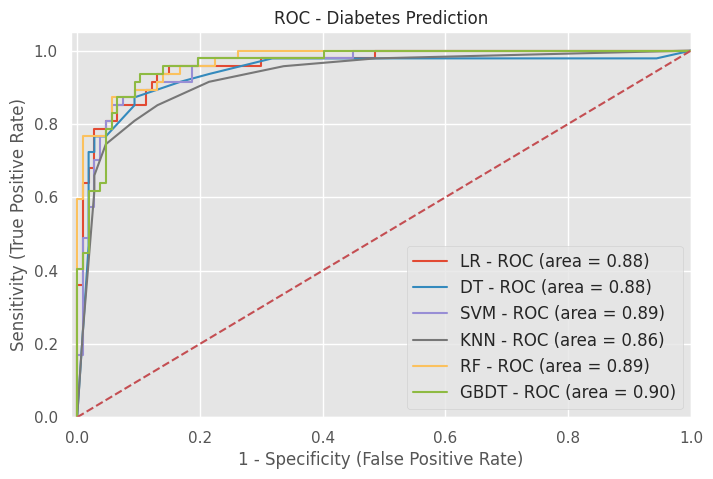

In [67]:
from sklearn import metrics
plt.figure(figsize=(8,5))
models = [
{
    'label': 'LR',
    'model': best_log_reg,
},
{
    'label': 'DT',
    'model': DT,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': best_knn,
},
{
    'label': 'RF',
    'model': best_rand_clf,
},
{
    'label': 'GBDT',
    'model': best_gb_clf,
}
]
for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Diabetes Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.savefig("roc_diabetes.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

[89.61, 87.66000000000001, 90.25999999999999, 87.66000000000001, 89.61, 90.25999999999999]
[88.35, 84.69, 88.81, 85.75, 88.94, 90.01]


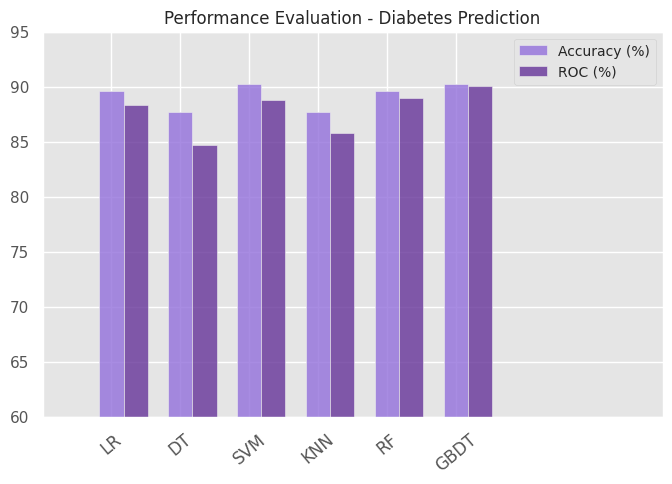

In [68]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
models = [
{
    'label': 'LR',
    'model': best_log_reg,
},
{
    'label': 'DT',
    'model': DT,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': best_knn,
},
{
    'label': 'RF',
    'model': best_rand_clf,
},
{
    'label': 'GBDT',
    'model': best_gb_clf,
}
]

means_roc = []
means_accuracy = [100*round(log_reg_acc,4), 100*round(dt_acc,4), 100*round(svc_acc,4), 100*round(knn_acc,4),
                  100*round(rand_acc,4), 100*round(gbc_acc,4)]

for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    auc = 100*round(auc,4)
    means_roc.append(auc)

print(means_accuracy)
print(means_roc)

# data to plot
n_groups = 6
means_accuracy = tuple(means_accuracy)
means_roc = tuple(means_roc)

# create plot
fig, ax = plt.subplots(figsize=(8,5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_accuracy, bar_width,
alpha=opacity,
color='mediumpurple',
label='Accuracy (%)')

rects2 = plt.bar(index + bar_width, means_roc, bar_width,
alpha=opacity,
color='rebeccapurple',
label='ROC (%)')

plt.xlim([-1, 8])
plt.ylim([60, 95])

plt.title('Performance Evaluation - Diabetes Prediction', fontsize=12)
plt.xticks(index, ('LR', 'DT', 'SVM', 'KNN', 'RF', 'GBDT'), rotation=40, ha='center', fontsize=12)
plt.legend(loc="upper right", fontsize=10)
plt.savefig("PE_diabetes.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()